<a href="https://www.kaggle.com/code/houssemaminetouihri/mini-batch-gradient-descent-and-momentum?scriptVersionId=106431062" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Batch Gradient Descent
In Batch Gradient Descent, all the training data is taken into consideration to take a single step. We take the average of the gradients of all the training examples and then use that mean gradient to update our parameters. So that’s just one step of gradient descent in one epoch.


# Stochastic Gradient Descent
In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very **huge.** Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just **one example** at a time to take a single step. We do the following steps in one epoch for SGD :  
1-Take an example  
2-Feed it to Neural Network  
3-Calculate it’s gradient  
4-Use the gradient we calculated in step 3 to update the weights  
5-Repeat steps 1–4 for all the examples in training dataset  
Since we are considering just one example at a time the cost will fluctuate over the training examples and it will not necessarily decrease. But in the long run, you will see the cost decreasing with fluctuations.The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.  

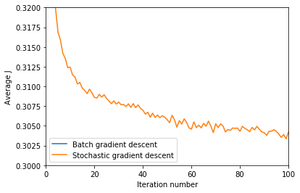!  

this is from an article : https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a  

Also because the cost is so fluctuating, it will never reach the minima but it will keep dancing around it.

SGD can be used for larger datasets. It converges faster when the dataset is large as it causes updates to the parameters more frequently.

# Mini Batch Gradient Descent
We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for **smoother curves.**  
SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, **we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.**
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw. So, after creating the mini-batches of fixed size, we do the following steps in one epoch:

1-Pick a mini-batch   
2-Feed it to Neural Network  
3-Calculate the mean gradient of the mini-batch  
4-Use the mean gradient we calculated in step 3 to update the weights  
5-Repeat steps 1–4 for the mini-batches we created  
Just like SGD, the average cost over the epochs in mini-batch gradient descent fluctuates because we are averaging a small number of examples at a time.

In [1]:
#optimizer = keras.optimizers.SGD(lr=0.01, decay=0.1, momentum=0.1, nesterov=False)
#There is a batch_size parameter in model.fit() in Keras.  history = model.fit(x, y, nb_epoch=num_epochs, batch_size=20, verbose=0, validation_split=0.1)





# Implementation in Keras
Implementing Mini Batch is pretty easy and straight forward in Keras.  
While calling the fit function in Keras, we do the following:  
from keras.models import Sequential

model = Sequential()  

model.add(...)  
...  
...  
  
model.compile(  
loss=LOSS_FUNCTION,  
optimizer=OPTIMIZER_FUNCTION,  #En_principe loptimizer eli lfouk
metrics=YOUR_CHOICE)  
history = model.fit(( INPUT_DATA ),  
          epochs=YOUR_EPOCHS,  
          batch_size=BATCH_NUMBER,  
          validation_data=( VALIDATION_DATA ),    
          ...,
          ...) #tnajem meghir history =

# How to Configure Mini-Batch Gradient Descent
#### Tip 1 : A good default for batch size might be 32.
here is another paper supporting a batch size of 32, here’s the quote (m is batch size):
The presented results confirm that using small batch sizes achieves the best training stability and generalization performance, for a given computational cost, across a wide range of experiments. In all cases the best results have been obtained with batch **sizes m = 32 or smaller, often as small as m = 2 or m = 4.**
#### Tip 2 : It is a good idea to review learning curves of model validation error against training time with different batch sizes when tuning the batch size.
#### Tip 3 : Tune batch size and learning rate after tuning all other hyperparameters.
https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/

example found on : https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/  
We can test this by re-running the model fit with **stochastic gradient descent and a smaller learning rate. For example, we can drop the learning rate by an order of magnitude form 0.01 to 0.001.**

Stability?

### Learning rate and Batch size 
For instance, **if we increase the batch size and our accuracy increases**, there’s no sense to modify the learning rate to achieve the prior results. Also, since there are many more hyperparameters to tune, we don’t know if the initial values of batch size and learning rate are optimal.(this i think is for the example from https://www.baeldung.com/cs/learning-rate-batch-size)

Usually, in practice, we tune these two hyperparameters with others together. Besides that, it’s common to set them up **independently**. For example, **if the neural network trains too slow, we might increase the batch size and monitor the results’ changes.** Also, we might ***improve the learning rate if the network converges too slow.***


https://www.youtube.com/watch?v=ZBVwnoVIvZk
one hand smaller batch sizes actually can ironically help your model train
better by adding a little bit of noise into that search but maybe a bigger
effect or another important effect is that a bigger batch size can help your
model train faster especially on GPUs  

... so you can see **lower learning rate** nothing really bad happens
but it learns **slower** and that can be really annoying when you're training
lots of models...    

... So **lower learning rates tend to be safer than higher learning rates**  ...  

..128 batch size is the each step is faster but it's actually performing worse than the CNN with the smaller batch size..  
...that ****as you increase the batch size you should also increase the
learning rate**** so if you multiply the batch size by four you should also
generally speaking and multiply the learning rate by four  ..  
especially this is really effective when you train over a large number of epochs
is you can reduce the learning rate **on plateau** so the idea here is that once

# What to remember:

The difference between gradient descent, mini-batch gradient descent and stochastic gradient descent is the number of examples you use to perform one update step.  
**1 - You have to tune a learning rate hyperparameter α .  
2 - With a well-turned mini-batch size, usually it outperforms either gradient descent or stochastic gradient descent (particularly when the training set is large).  
3 - Mini-batch Gradient Descent**

 # Momentum

this found on https://cemsarier.github.io/algorithms%20from%20scratch/optimization/neural%20network/optimization/

Because mini-batch gradient descent makes a parameter update after seeing just a subset of examples, the direction of the update has some variance (far from a right update?), and so the path taken by mini-batch gradient descent will “oscillate” toward convergence. **Using momentum can reduce these oscillations.**  
 β is the momentum's prameter in gradientdescent algorithms in Keras : #optimizer = keras.optimizers.SGD(lr=0.01, decay=0.1, momentum=0.1, nesterov=False)
If β=0 , then this just becomes standard gradient descent without momentum. **How do you choose β ?**

1) The larger the momentum β is, the smoother the update because the more we take the past gradients into account. But if β is too big, it could also smooth out the updates too much.
2) Common values for **β range from 0.8 to 0.999.** If you don’t feel inclined to tune this, **β=0.9 is often a reasonable default.**
! Tuning the optimal β for your model might need trying several values to see what works best in term of reducing the value of the cost function J. !
#### What to remember:
**You have to tune a momentum hyperparameter β and a learning rate α .**

Found on Improving Deep Neural Networks: Hyperparameter Tuning, Regularization and Optimization's course
by DeepLearning.AI on coursera :  
A lot of people felt that gradient descent with momentum really works well, was difficult to propose things that work much better. RMSprop and the Adam optimization algorithm, which we'll talk about in this video, is one of those rare algorithms that has really stood up, and has been shown to work well across a wide range of deep learning architectures.

# RMSprop

# ADAM

The Adam optimization algorithm is basically taking momentum and RMSprop, 
and putting them together.


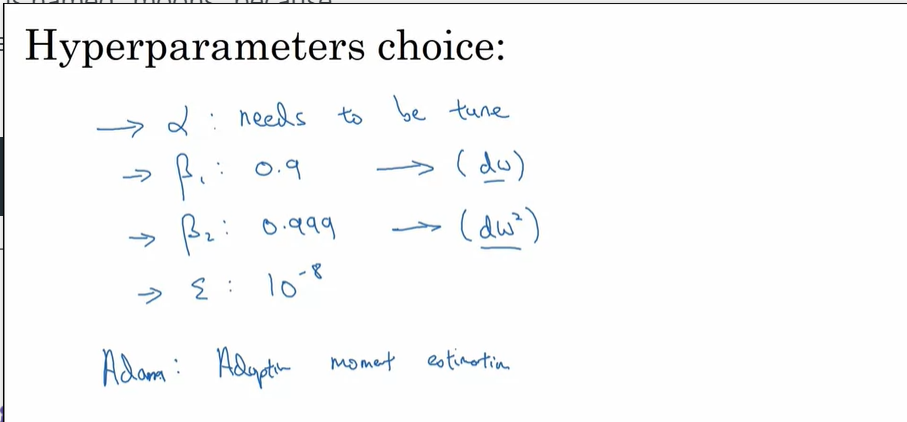

The implementation on keras : tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
    **kwargs
)